## Imports, Data loading & preprocessing

In [45]:
!pip install hyperopt

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import seaborn as sns
import plotly.graph_objects as go
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans
from sklearn import datasets
import statistics as s

In [6]:
demographic_batches= np.load('preprocessed_batches/batch_demographic.npy', allow_pickle = True)
demographic = pd.DataFrame(np.load('preprocessed_batches/df_demographic.npy', allow_pickle=True), columns = [ 'sex', 'age',  'bmi', 'death', 'gcs'])

print(demographic)

    sex age     bmi death gcs
0     0  53  22.784     0   6
1     1  56     NaN     0   6
2     1  50  24.285     0   9
3     1  19  27.588     0   9
4     1  89     NaN     0   7
..   ..  ..     ...   ...  ..
924   0  24     NaN     0  12
925   1  66  21.028     0  10
926   0  76     NaN     0  10
927   1  61     NaN     0   8
928   1  79  24.983     0   9

[929 rows x 5 columns]


In [7]:
import matplotlib.pyplot as plt
plt.hist(demographic['los'], bins=40)

KeyError: 'los'

In [ ]:
def label_severity (row):
   if row['gcs'] <= 8 :
       return 1
return 0

## Univariate analysis

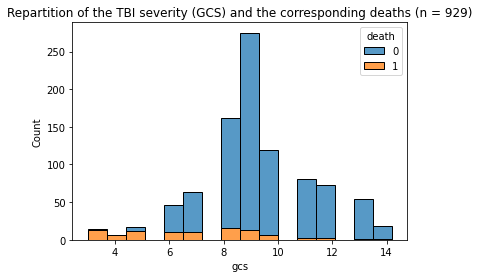

[Text(0.5, 1.0, 'Repartition of the TBI severity (GCS) and the corresponding deaths (n = 929)')]

In [6]:
sns.histplot(data = demographic, x = "gcs", hue = "death", multiple="stack", binwidth=0.7).set(title='Repartition of the TBI severity (GCS) and the corresponding deaths (n = 929)')

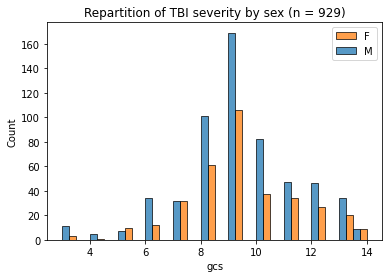

In [22]:
sns.histplot(data = demographic, x = "gcs", hue = "sex", multiple="dodge", binwidth=0.5).set(title='Repartition of TBI severity by sex (n = 929)')
plt.legend(labels = ['F', 'M'])

3.924554398148148


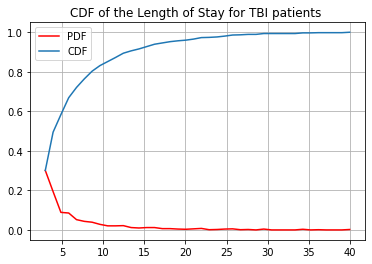

In [49]:
count, bins_count = np.histogram(demographic['los'], bins=40)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.grid()
plt.title('CDF of the Length of Stay for TBI patients ')
print(s.median(demographic['los']))

## Multivariate analysis

In [50]:
fig = go.Figure()
fig.add_trace(go.Box( y = demographic['age'], x= demographic['death'], boxpoints='all'))
fig.update_layout(xaxis_title='Deaths repartition -  0 = stayed alive during the ICU stay, 1 = died during the ICU stay - N = 614', yaxis_title = "Age in years")


[Text(0.5, 1.0, 'Repartition of the TBI severity (GCS) and the corresponding deaths')]

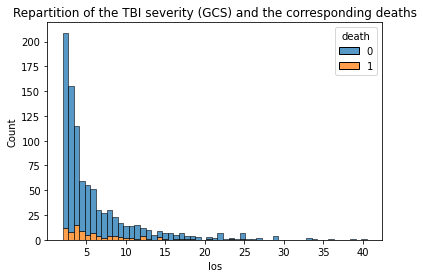

In [51]:
#analysis of death and length of stay 
sns.histplot(data = demographic, x = "los", hue = "death", multiple="stack", binwidth=0.7).set(title='Repartition of the TBI severity (GCS) and the corresponding deaths')


In [52]:
fig = go.Figure()
fig.add_trace(go.Box( y = demographic['gcs'], x= demographic['death'], boxpoints='all', marker_color = 'red'))
fig.update_layout(xaxis_title='Deaths repartition -  0 = stayed alive during the ICU stay, 1 = died during the ICU stay - N = 614', yaxis_title = "Glasgow Coma Scale (GCS)")


In [53]:
fig = go.Figure()
fig.add_trace(go.Box( y = demographic['los'], x= demographic['death'], boxpoints='all', marker_color = 'red'))
fig.update_layout(xaxis_title='Deaths/Los repartition -  0 = stayed alive during the ICU stay, 1 = died during the ICU stay \n N = 614', yaxis_title = "Length of stay")


In [54]:
labels = demographic['los']
print(labels)
labels[labels <= 4] = 0
labels[labels > 4] = 1
print(labels)
print(labels.sum())

0       3.325139
1       2.814954
2       8.457454
3       7.523762
4       8.934433
         ...    
919     2.167859
920     8.703519
921    12.393704
922     3.601539
923     6.632975
Name: los, Length: 924, dtype: object
0      0
1      0
2      1
3      1
4      1
      ..
919    0
920    1
921    1
922    0
923    1
Name: los, Length: 924, dtype: object
452
